# 12 Steps to Navier-Stokes
---

## Step 1: 1-D Linear Convection

The 1-D Linear Convection equation:

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
$$

After discretizing the equation, solving for unknown to advance in time:

$$
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x} \left( u_i^n - u_{i-1}^n \right)
$$

In [21]:
import numpy
from matplotlib import pyplot
import time, sys

In [22]:
%matplotlib inline

In [23]:
nx = 41         # No. of points in grid
dx = 2 / (nx-1) # Length of each spacial step
nt = 25         # No. of points in time
dt = .025       # Duration of each time step
c  = 1          # Speed of the wave

In [24]:
u = numpy.ones(nx)
u[int(.5/dx): int(1/dx + 1)] = 2 # Initial condition of u = 2 b/w 0.5 and 1
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


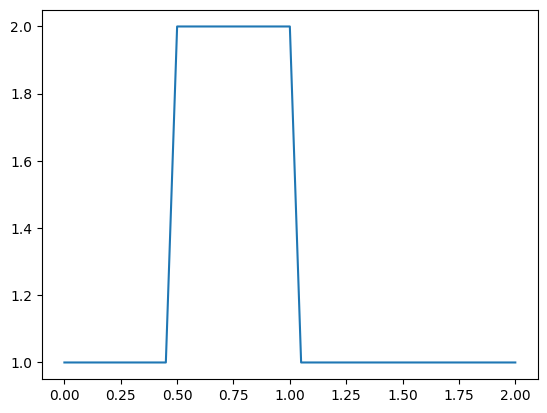

In [25]:
pyplot.plot(numpy.linspace(0, 2, nx), u)

In [26]:
un = numpy.ones(nx) # Temporary array to store solution of u for next time step
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

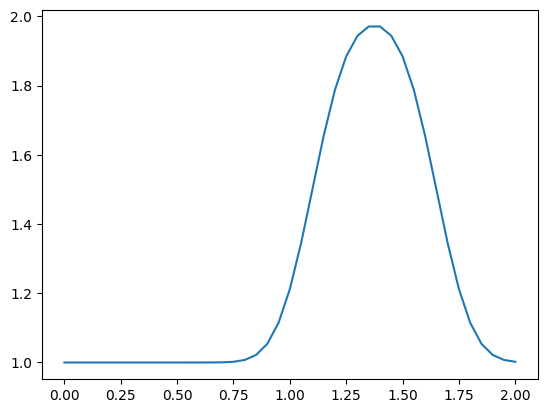

In [27]:
pyplot.plot(numpy.linspace(0, 2, nx), u);

## Step 2: Nonlinear convection

The Nonlinear equation, where constant c is replaced by u:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
$$

Hence, solving for unknown after discretization gives:

$$
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} \left( u_i^n - u_{i-1}^n \right)
$$

In [28]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

nx = 41
dx = 2 / (nx-1)
nt = 25
dt = 0.025

u = numpy.ones(nx)
u[int(.5/dx): int(1/dx + 1)] = 2

un = numpy.ones(nx)

In [29]:
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])

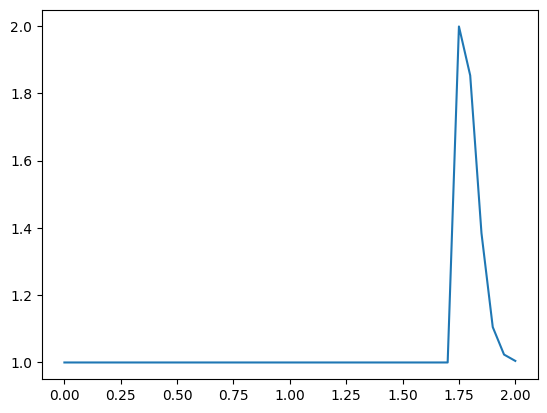

In [30]:
pyplot.plot(numpy.linspace(0, 2, nx), u)

### Convergence and the CFL Condition

As we adjust the grid size, initially the numerical diffusion reduces and the pattern approaches a square wave, however later it doesn't look anything like the original hat function

In [1]:
import numpy                 
from matplotlib import pyplot    
%matplotlib inline

def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    #nt is the number of timesteps we want to calculate
    dt = .025  #dt is the amount of time each timestep covers (delta t)
    c = 1

    u = numpy.ones(nx)      #defining a numpy array which is nx elements long with every value equal to 1.
    u[int(.5/dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

    un = numpy.ones(nx) #initializing our placeholder array, un, to hold the values we calculate for the n+1 timestep

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u);

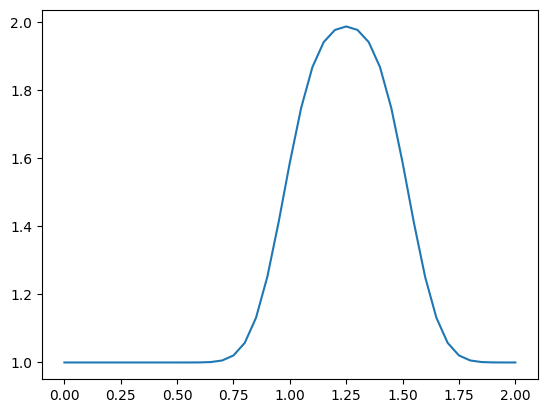

In [2]:
linearconv(41)

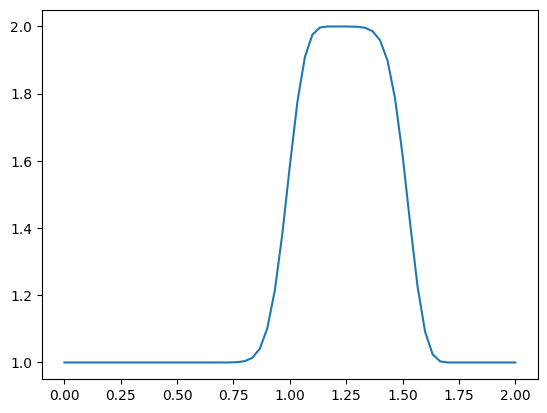

In [3]:
linearconv(61)

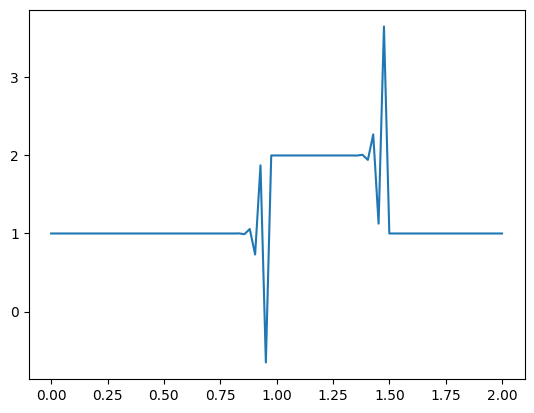

In [4]:
linearconv(85)

The code calculates the speed of the wave at each of th epoints x. In the last plot, the wave travels a distance more then dx over the time $\Delta t$. Stability can be enforced if $\Delta t$ step size is calculated with respect to dx rather than being independent.

$$
\sigma = \frac{u \Delta t}{\Delta x} \le \sigma_{max}
$$

where u is the speed of the wave, $\sigma$ is called the **Courant Number** and the value of $\sigma_{max}$ that will ensure stability depends on the discretization used.

In [5]:
import numpy
from matplotlib import pyplot

def linearconv(nx):
    dx = 2 / (nx - 1)
    nt = 20    
    c = 1
    sigma = .5
    
    dt = sigma * dx

    u = numpy.ones(nx) 
    u[int(.5/dx):int(1 / dx + 1)] = 2

    un = numpy.ones(nx)

    for n in range(nt):  
        un = u.copy() 
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    pyplot.plot(numpy.linspace(0, 2, nx), u)

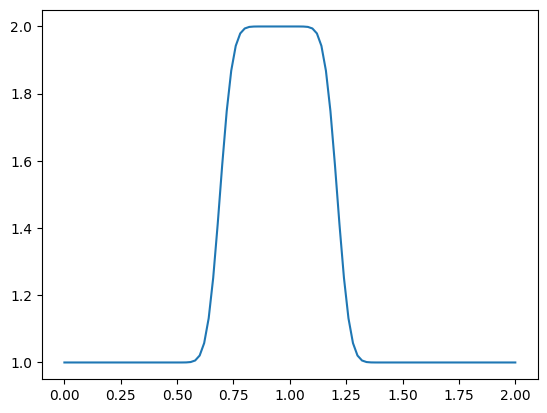

In [6]:
linearconv(101)

## Step 3: Diffusion Equation in 1-D

the one-dimensional diffusion equation is:

$$
\frac{\partial u}{\partial t} = v \frac{\partial^2 u}{\partial^2 x}
$$

Unlike the first two equations, this has a second-order derivative.

### Discretizing $\frac{\partial^2 u}{\partial^2 x}$

The second-order derivative can be represented geometrically as the line tangent to the curve given by the first derivative. We will discretize the second-order derivative with a Central Difference scheme: a combination of Forward Difference and Backward Difference of the first derivative. Consider the Taylor expansion of $u_{i+1}$ and $u_{i-1}$ around $u_i$:

$$
u_{i+1} = u_i + \Delta x \left.\frac{\partial u}{\partial x} \right |_i + \frac{\Delta x^2}{2} \left.\frac{\partial^2 u}{\partial^2 x} \right |_i + \frac{\Delta x^3}{3!} \left.\frac{\partial^3 u}{\partial^3 x} \right |_i + O(\Delta x^4)
$$

$$
u_{i-1} = u_i - \Delta x \left.\frac{\partial u}{\partial x} \right |_i + \frac{\Delta x^2}{2} \left.\frac{\partial^2 u}{\partial^2 x} \right |_i - \frac{\Delta x^3}{3!} \left.\frac{\partial^3 u}{\partial^3 x} \right |_i + O(\Delta x^4)
$$

When we add the two expansions, the odd-numbered derivatives cancel each other out. If we neglect any terms of $O(x^4)$ or higher (which are negligible), we can rearrange the sum to solve for our second-order derivative.

$$
u_{i+1} + u_{i-1} = 2u_i + \Delta x^2 \left.\frac{\partial^2 u}{\partial^2 x} \right |_i + O(\Delta x^4)
$$

$$
\frac{\partial^2 u}{\partial^2 x} = \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2} + O(\Delta x^4)
$$


## Returning to Step 3
We can now write the discretized diffusion equation in 1D:

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} = v \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}
$$

As before, once we have an inital condition there is only one unknown to solve for:

$$
u_i^{n+1} = u_i^n + \frac{v\Delta t}{\Delta x^2} (u_{i+1} - 2u_i + u_{i-1})
$$

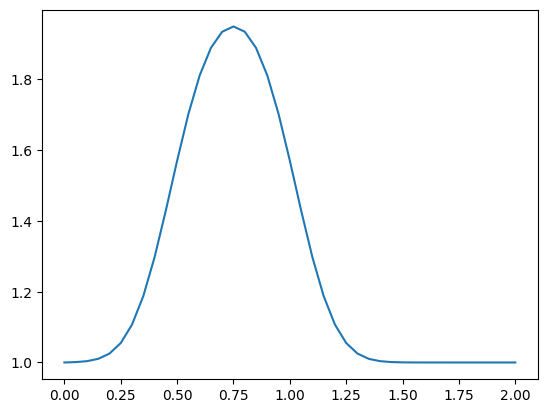

In [11]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

nx = 41
dx = 2 / (nx-1)
nt = 20
nu = 0.3  # The value of viscosity
sigma = .2
dt = sigma * dx**2 / nu


u = numpy.ones(nx)
u[int(.5/dx): int(1/dx + 1)] = 2

un = numpy.ones(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])

pyplot.plot(numpy.linspace(0, 2, nx), u);